# Analyzing the impact of various sectors on GDP per capita of USA

In [5]:
import wbdata
import pandas as pd
import pycountry
import datetime
import matplotlib.pyplot as plt

#Selecting country from world bank data
countries = ["USA"]

#Gathering data of various sector for the country
indicators1 = { 
               'BX.KLT.DINV.WD.GD.ZS': 'FDI net inflows', 
               'BM.KLT.DINV.WD.GD.ZS':'FDI net outflows', 
              'SH.XPD.GHED.GD.ZS': 'Domestic health expenditure',
              'GC.XPN.TOTL.GD.ZS': 'Expense on Goods & Services',
              'NE.CON.TOTL.ZS': 'Final consumption expenditure',
                'NV.AGR.TOTL.ZS' : 'Agriculture,forestry,fishing',
           'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure'
              }

#Indicating the time frame(years)
data_date = (datetime.datetime(1970, 1, 1), datetime.datetime(2015, 1, 1))
 
#Getting a dataframe with all the data 
df1 = wbdata.get_dataframe(indicators1, country=countries, data_date=data_date ,convert_date=False)


***Foreign direct investment inflow*** are the net inflows of investment to acquire a lasting management interest (10 percent or more of voting stock) in an enterprise operating in an economy other than that of the investor.

***Foreign direct investment outflow*** refers to direct investment equity flows in an economy. It is the sum of equity capital, reinvestment of earnings, and other capita.

***Domestic general government health expenditure (% of GDP)*** refers to public expenditure on health from domestic sources as a share of the economy as measured by GDP,World Health Organization Global Health Expenditure database (http://apps.who.int/nha/database).***

***Expense on goods and services*** is cash payments for operating activities of the government in providing goods and services. It includes compensation of employees (such as wages and salaries), interest and subsidies, grants, social benefits, and other expenses such as rent and dividends.

***Final consumption expenditure*** (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption).

***Agriculture*** corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs

***Gross domestic expenditures on research and development (R&D),*** expressed as a percent of GDP. They include both capital and current expenditures in the four main sectors: Business enterprise, Government, Higher education and Private non-profit. R&D covers basic research, applied research, and experimental development.

In [6]:
#Inserting the country code
df1.insert(0, "Country code","USA")
df1

Country code  FDI net inflows  FDI net outflows  \
date                                                   
2015          USA         2.794219          1.685334   
2014          USA         1.437391          2.211703   
2013          USA         1.716614          2.340182   
2012          USA         1.545625          2.329072   
2011          USA         1.695323          2.809160   
2010          USA         1.761193          2.333423   
2009          USA         1.114844          2.163461   
2008          USA         2.318328          2.335259   
2007          USA         2.398397          3.625070   
2006          USA         2.160488          2.054354   
2005          USA         1.091876          0.403409   
2004          USA         1.749187          3.062161   
2003          USA         1.022024          1.703734   
2002          USA         1.015460          1.636596   
2001          USA         1.630116          1.380112   
2000          USA         3.405318          1.817828   
1999          USA         3.244314          2.569760   
1998          USA         2.329849          1.928318   
1997          USA         1.424066          1.415089   
1996          USA         1.209693          1.276086   
1995          USA         0.904218          1.440623   
1994          USA         0.767644          1.234899   
1993          USA         0.732370          1.207251   
1992          USA         0.464854          0.901335   
1991          USA         0.561047          0.800081   
1990          USA         1.194504          1.005174   
1989          USA         1.343241          0.903648   
1988          USA         1.086807          0.414423   
1987          USA         1.302414          0.819675   
1986          USA         0.675731          0.426323   
1985          USA         0.221942          0.084813   
1984          USA         0.624874          0.317514   
1983          USA         0.316452          0.241329   
1982          USA         0.634908          0.232491   
1981          USA         0.800738          0.315244   
1980          USA         0.585866          0.666362   
1979          USA         0.306394          0.940878   
1978          USA         0.233883          0.611074   
1977          USA         0.140261          0.541832   
1976          USA         0.155332          0.604245   
1975          USA         0.137100          0.814883   
1974          USA         0.229090          0.333928   
1973          USA         0.135403          0.655266   
1972          USA         0.099288          0.573055   
1971          USA         0.066103          0.482466   
1970          USA         0.113668          0.604675   

      Domestic health expenditure  Expense on Goods & Services  \
date                                                             
2015                     8.505196                    22.489856   
2014                     8.280054                    22.740197   
2013                     7.986787                    23.022910   
2012                     7.927314                    23.999774   
2011                     7.948322                    25.443340   
2010                     7.965013                    26.159443   
2009                     7.893756                    25.634014   
2008                     7.248606                    22.881568   
2007                     6.910945                    20.900193   
2006                     6.788923                    20.599476   
2005                     6.599860                    20.752411   
2004                     6.576984                    20.457733   
2003                     6.492592                    20.665058   
2002                     6.298086                    20.081282   
2001                     5.946036                    19.515910   
2000                     5.524876                    17.924094   
1999                          NaN                    18.105397   
1998                          NaN                    18.721329

In [7]:
df1.reset_index(inplace = True)

#### Performing Exploratory Data Analysis on the data to elimate the NaN values

In [9]:
df1['Research and development expenditure']= df1['Research and development expenditure'].interpolate(method = 'polynomial', order = 2)
df1['Research and development expenditure'] = df1['Research and development expenditure'].interpolate(method = 'pad')
df1['Domestic health expenditure'] = df1['Domestic health expenditure'].interpolate(method = 'pad')
df1['Agriculture,forestry,fishing'] = df1['Agriculture,forestry,fishing'].interpolate(method = 'pad')
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'pad')
df1

date Country code  FDI net inflows  FDI net outflows  \
0   2015          USA         2.794219          1.685334   
1   2014          USA         1.437391          2.211703   
2   2013          USA         1.716614          2.340182   
3   2012          USA         1.545625          2.329072   
4   2011          USA         1.695323          2.809160   
5   2010          USA         1.761193          2.333423   
6   2009          USA         1.114844          2.163461   
7   2008          USA         2.318328          2.335259   
8   2007          USA         2.398397          3.625070   
9   2006          USA         2.160488          2.054354   
10  2005          USA         1.091876          0.403409   
11  2004          USA         1.749187          3.062161   
12  2003          USA         1.022024          1.703734   
13  2002          USA         1.015460          1.636596   
14  2001          USA         1.630116          1.380112   
15  2000          USA         3.405318          1.817828   
16  1999          USA         3.244314          2.569760   
17  1998          USA         2.329849          1.928318   
18  1997          USA         1.424066          1.415089   
19  1996          USA         1.209693          1.276086   
20  1995          USA         0.904218          1.440623   
21  1994          USA         0.767644          1.234899   
22  1993          USA         0.732370          1.207251   
23  1992          USA         0.464854          0.901335   
24  1991          USA         0.561047          0.800081   
25  1990          USA         1.194504          1.005174   
26  1989          USA         1.343241          0.903648   
27  1988          USA         1.086807          0.414423   
28  1987          USA         1.302414          0.819675   
29  1986          USA         0.675731          0.426323   
30  1985          USA         0.221942          0.084813   
31  1984          USA         0.624874          0.317514   
32  1983          USA         0.316452          0.241329   
33  1982          USA         0.634908          0.232491   
34  1981          USA         0.800738          0.315244   
35  1980          USA         0.585866          0.666362   
36  1979          USA         0.306394          0.940878   
37  1978          USA         0.233883          0.611074   
38  1977          USA         0.140261          0.541832   
39  1976          USA         0.155332          0.604245   
40  1975          USA         0.137100          0.814883   
41  1974          USA         0.229090          0.333928   
42  1973          USA         0.135403          0.655266   
43  1972          USA         0.099288          0.573055   
44  1971          USA         0.066103          0.482466   
45  1970          USA         0.113668          0.604675   

    Domestic health expenditure  Expense on Goods & Services  \
0                      8.505196                    22.489856   
1                      8.280054                    22.740197   
2                      7.986787                    23.022910   
3                      7.927314                    23.999774   
4                      7.948322                    25.443340   
5                      7.965013                    26.159443   
6                      7.893756                    25.634014   
7                      7.248606                    22.881568   
8                      6.910945                    20.900193   
9                      6.788923                    20.599476   
10                     6.599860                    20.752411   
11                     6.576984                    20.457733   
12                     6.492592                    20.665058   
13                     6.298086                    20.081282   
14                     5.946036                    19.515910   
15                     5.524876                    17.924094   
16                     5.524876                    18.105397   
17                     5.524876

### Collect GDP after two years data from world bank and merge it with the above dataframe

In [10]:
#grab indicators above for countires above and load into data frame
data_date = (datetime.datetime(1972, 1, 1), datetime.datetime(2017, 1, 1))
indicators2 = {'NY.GDP.PCAP.CD': 'GDP per Capita after 2 years'}
              

In [11]:
#grab indicators above for countires above and load into data frame
df2 = wbdata.get_dataframe(indicators2, country=countries, data_date=data_date ,convert_date=False)

In [12]:
df2

GDP per Capita after 2 years
date                              
2017                  59927.929834
2016                  57904.201961
2015                  56803.472433
2014                  55032.957998
2013                  53106.909770
2012                  51603.497261
2011                  49883.113984
2010                  48466.823375
2009                  47099.980471
2008                  48382.558449
2007                  47975.967676
2006                  46298.731444
2005                  44114.747778
2004                  41712.801068
2003                  39496.485875
2002                  38023.161114
2001                  37133.242809
2000                  36334.908777
1999                  34513.561504
1998                  32853.676985
1997                  31459.139002
1996                  29967.712718
1995                  28690.875701
1994                  27694.853416
1993                  26387.293734
1992                  25418.990776
1991                  24342.258905
1990                  23888.600009
1989                  22857.154433
1988                  21417.011931
1987                  20038.941099
1986                  19071.227195
1985                  18236.827727
1984                  17121.225485
1983                  15543.893717
1982                  14433.787727
1981                  13976.109750
1980                  12574.791506
1979                  11674.186310
1978                  10564.948222
1977                   9452.576519
1976                   8592.253537
1975                   7801.456664
1974                   7225.691360
1973                   6726.358956
1972                   6094.017990

In [13]:
df2.reset_index(inplace = True)

In [14]:
df2 = df2.drop(['date'],axis = 1)

In [15]:
df2

GDP per Capita after 2 years
0                   59927.929834
1                   57904.201961
2                   56803.472433
3                   55032.957998
4                   53106.909770
5                   51603.497261
6                   49883.113984
7                   48466.823375
8                   47099.980471
9                   48382.558449
10                  47975.967676
11                  46298.731444
12                  44114.747778
13                  41712.801068
14                  39496.485875
15                  38023.161114
16                  37133.242809
17                  36334.908777
18                  34513.561504
19                  32853.676985
20                  31459.139002
21                  29967.712718
22                  28690.875701
23                  27694.853416
24                  26387.293734
25                  25418.990776
26                  24342.258905
27                  23888.600009
28                  22857.154433
29                  21417.011931
30                  20038.941099
31                  19071.227195
32                  18236.827727
33                  17121.225485
34                  15543.893717
35                  14433.787727
36                  13976.109750
37                  12574.791506
38                  11674.186310
39                  10564.948222
40                   9452.576519
41                   8592.253537
42                   7801.456664
43                   7225.691360
44                   6726.358956
45                   6094.017990

In [16]:
df_joined = pd.merge(df1,df2,left_index=True, right_index=True)
df_joined

date Country code  FDI net inflows  FDI net outflows  \
0   2015          USA         2.794219          1.685334   
1   2014          USA         1.437391          2.211703   
2   2013          USA         1.716614          2.340182   
3   2012          USA         1.545625          2.329072   
4   2011          USA         1.695323          2.809160   
5   2010          USA         1.761193          2.333423   
6   2009          USA         1.114844          2.163461   
7   2008          USA         2.318328          2.335259   
8   2007          USA         2.398397          3.625070   
9   2006          USA         2.160488          2.054354   
10  2005          USA         1.091876          0.403409   
11  2004          USA         1.749187          3.062161   
12  2003          USA         1.022024          1.703734   
13  2002          USA         1.015460          1.636596   
14  2001          USA         1.630116          1.380112   
15  2000          USA         3.405318          1.817828   
16  1999          USA         3.244314          2.569760   
17  1998          USA         2.329849          1.928318   
18  1997          USA         1.424066          1.415089   
19  1996          USA         1.209693          1.276086   
20  1995          USA         0.904218          1.440623   
21  1994          USA         0.767644          1.234899   
22  1993          USA         0.732370          1.207251   
23  1992          USA         0.464854          0.901335   
24  1991          USA         0.561047          0.800081   
25  1990          USA         1.194504          1.005174   
26  1989          USA         1.343241          0.903648   
27  1988          USA         1.086807          0.414423   
28  1987          USA         1.302414          0.819675   
29  1986          USA         0.675731          0.426323   
30  1985          USA         0.221942          0.084813   
31  1984          USA         0.624874          0.317514   
32  1983          USA         0.316452          0.241329   
33  1982          USA         0.634908          0.232491   
34  1981          USA         0.800738          0.315244   
35  1980          USA         0.585866          0.666362   
36  1979          USA         0.306394          0.940878   
37  1978          USA         0.233883          0.611074   
38  1977          USA         0.140261          0.541832   
39  1976          USA         0.155332          0.604245   
40  1975          USA         0.137100          0.814883   
41  1974          USA         0.229090          0.333928   
42  1973          USA         0.135403          0.655266   
43  1972          USA         0.099288          0.573055   
44  1971          USA         0.066103          0.482466   
45  1970          USA         0.113668          0.604675   

    Domestic health expenditure  Expense on Goods & Services  \
0                      8.505196                    22.489856   
1                      8.280054                    22.740197   
2                      7.986787                    23.022910   
3                      7.927314                    23.999774   
4                      7.948322                    25.443340   
5                      7.965013                    26.159443   
6                      7.893756                    25.634014   
7                      7.248606                    22.881568   
8                      6.910945                    20.900193   
9                      6.788923                    20.599476   
10                     6.599860                    20.752411   
11                     6.576984                    20.457733   
12                     6.492592                    20.665058   
13                     6.298086                    20.081282   
14                     5.946036                    19.515910   
15                     5.524876                    17.924094   
16                     5.524876                    18.105397   
17                     5.524876

### Normalizing the data in the column to bring all the columns to a common scale

We have used MinMaxScaler from sklearn for normalization

In [17]:

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']] = pd.DataFrame(x_scaled)

### Finding the correlation between the data

In [18]:
df_joined.corr()

FDI net inflows  FDI net outflows  \
FDI net inflows                              1.000000          0.749809   
FDI net outflows                             0.749809          1.000000   
Domestic health expenditure                  0.474142          0.677726   
Expense on Goods & Services                  0.166237          0.311342   
Final consumption expenditure                0.545716          0.740752   
Agriculture,forestry,fishing                -0.637216         -0.655245   
Research and development expenditure         0.624495          0.740706   
GDP per Capita after 2 years                 0.752672          0.805253   

                                      Domestic health expenditure  \
FDI net inflows                                          0.474142   
FDI net outflows                                         0.677726   
Domestic health expenditure                              1.000000   
Expense on Goods & Services                              0.657662   
Final consumption expenditure                            0.806586   
Agriculture,forestry,fishing                            -0.674431   
Research and development expenditure                     0.903351   
GDP per Capita after 2 years                             0.832525   

                                      Expense on Goods & Services  \
FDI net inflows                                          0.166237   
FDI net outflows                                         0.311342   
Domestic health expenditure                              0.657662   
Expense on Goods & Services                              1.000000   
Final consumption expenditure                            0.677013   
Agriculture,forestry,fishing                            -0.314568   
Research and development expenditure                     0.575162   
GDP per Capita after 2 years                             0.567196   

                                      Final consumption expenditure  \
FDI net inflows                                            0.545716   
FDI net outflows                                           0.740752   
Domestic health expenditure                                0.806586   
Expense on Goods & Services                                0.677013   
Final consumption expenditure                              1.000000   
Agriculture,forestry,fishing                              -0.736534   
Research and development expenditure                       0.817887   
GDP per Capita after 2 years                               0.884648   

                                      Agriculture,forestry,fishing  \
FDI net inflows                                          -0.637216   
FDI net outflows                                         -0.655245   
Domestic health expenditure                              -0.674431   
Expense on Goods & Services                              -0.314568   
Final consumption expenditure                            -0.736534   
Agriculture,forestry,fishing                              1.000000   
Research and development expenditure                     -0.769502   
GDP per Capita after 2 years                             -0.743655   

                                      Research and development expenditure  \
FDI net inflows                                                   0.624495   
FDI net outflows                                                  0.740706   
Domestic health expenditure                                       0.903351   
Expense on Goods & Services                                       0.575162   
Final consumption expenditure                                     0.817887   
Agriculture,forestry,fishing                                     -0.769502   
Research and development expenditure                              1.000000   
GDP per Capita after 2 years                                      0.825930   

                                      GDP per Capita after 2 years  
FDI net inflows                                           0.752672  
FDI ne

### Heat map of the correlation

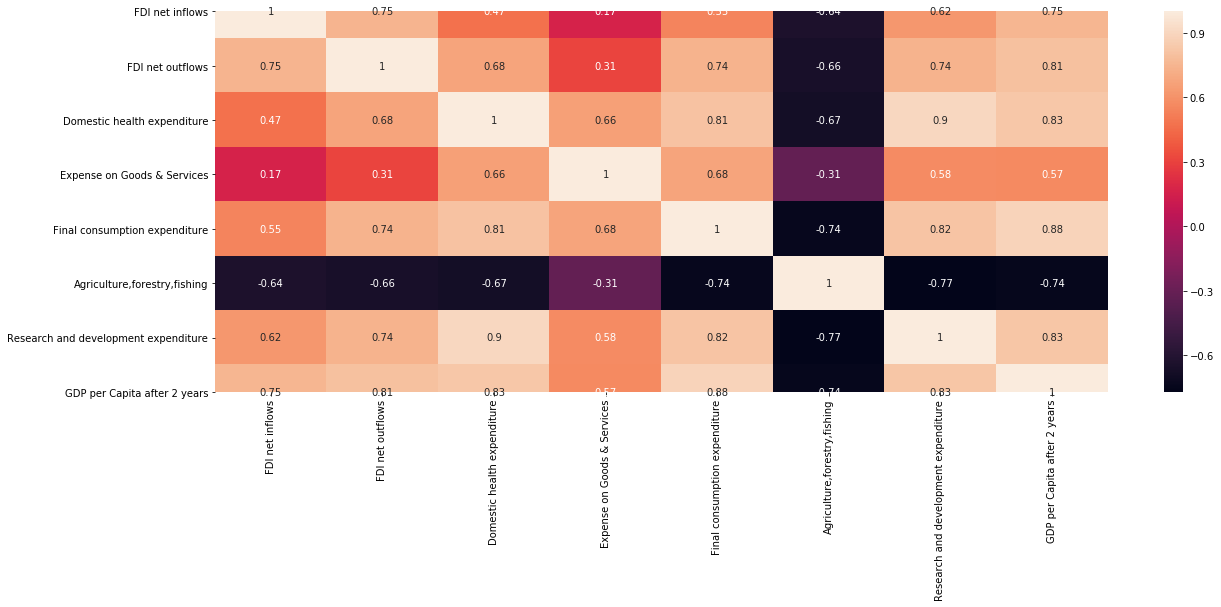

In [19]:
import seaborn as sns
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_joined.corr(), annot=True)

In [20]:
df_joined

date Country code  FDI net inflows  FDI net outflows  \
0   2015          USA         0.816993          0.452092   
1   2014          USA         0.410662          0.600773   
2   2013          USA         0.494281          0.637064   
3   2012          USA         0.443075          0.633926   
4   2011          USA         0.487905          0.769534   
5   2010          USA         0.507631          0.635154   
6   2009          USA         0.314068          0.587146   
7   2008          USA         0.674477          0.635673   
8   2007          USA         0.698456          1.000000   
9   2006          USA         0.627209          0.556327   
10  2005          USA         0.307190          0.089992   
11  2004          USA         0.504036          0.840998   
12  2003          USA         0.286271          0.457289   
13  2002          USA         0.284306          0.438325   
14  2001          USA         0.468378          0.365877   
15  2000          USA         1.000000          0.489517   
16  1999          USA         0.951784          0.701912   
17  1998          USA         0.677928          0.520727   
18  1997          USA         0.406671          0.375757   
19  1996          USA         0.342473          0.336494   
20  1995          USA         0.250992          0.382970   
21  1994          USA         0.210091          0.324860   
22  1993          USA         0.199528          0.317050   
23  1992          USA         0.119415          0.230639   
24  1991          USA         0.148222          0.202038   
25  1990          USA         0.337924          0.259970   
26  1989          USA         0.382466          0.231292   
27  1988          USA         0.305672          0.093103   
28  1987          USA         0.370240          0.207573   
29  1986          USA         0.182566          0.096465   
30  1985          USA         0.046669          0.000000   
31  1984          USA         0.167336          0.065730   
32  1983          USA         0.074973          0.044211   
33  1982          USA         0.170341          0.041714   
34  1981          USA         0.220002          0.065089   
35  1980          USA         0.155654          0.164267   
36  1979          USA         0.071960          0.241809   
37  1978          USA         0.050245          0.148650   
38  1977          USA         0.022208          0.129092   
39  1976          USA         0.026721          0.146722   
40  1975          USA         0.021262          0.206220   
41  1974          USA         0.048810          0.070366   
42  1973          USA         0.020753          0.161133   
43  1972          USA         0.009938          0.137911   
44  1971          USA         0.000000          0.112323   
45  1970          USA         0.014244          0.146843   

    Domestic health expenditure  Expense on Goods & Services  \
0                      1.000000                     0.561113   
1                      0.924457                     0.591055   
2                      0.826056                     0.624867   
3                      0.806101                     0.741701   
4                      0.813149                     0.914353   
5                      0.818750                     1.000000   
6                      0.794841                     0.937158   
7                      0.578371                     0.607963   
8                      0.465074                     0.370988   
9                      0.424131                     0.335022   
10                     0.360694                     0.353313   
11                     0.353018                     0.318069   
12                     0.324702                     0.342866   
13                     0.259439                     0.273045   
14                     0.141313                     0.205426   
15                     0.000000                     0.015044   
16                     0.000000                     0.036728   
17                     0.000000

### Using OLS for finding the p value and t statistics 

In [21]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(df_joined['GDP per Capita after 2 years'], df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services', 'Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]).fit()

# Print out the statistic
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     GDP per Capita after 2 years   R-squared (uncentered):                   0.978
Model:                                      OLS   Adj. R-squared (uncentered):              0.974
Method:                           Least Squares   F-statistic:                              249.4
Date:                          Mon, 20 Apr 2020   Prob (F-statistic):                    2.47e-30
Time:                                  15:51:55   Log-Likelihood:                          51.091
No. Observations:                            46   AIC:                                     -88.18
Df Residuals:                                39   BIC:                                     -75.38
Df Model:                                     7                                                  
Covariance Type:                      nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
FDI net inflows                          0.5170      0.081      6.416      0.000       0.354       0.680
FDI net outflows                         0.0051      0.109      0.047      0.963      -0.214       0.225
Domestic health expenditure              0.4736      0.107      4.411      0.000       0.256       0.691
Expense on Goods & Services              0.0215      0.088      0.246      0.807      -0.156       0.199
Final consumption expenditure            0.5454      0.103      5.290      0.000       0.337       0.754
Agriculture,forestry,fishing            -0.0048      0.031     -0.155      0.877      -0.068       0.058
Research and development expenditure    -0.2909      0.120     -2.421      0.020      -0.534      -0.048
==============================================================================
Omnibus:                        4.359   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                1.976
Skew:                           0.151   Prob(JB):                        0.372
Kurtosis:                       2.031   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For any modelling task, the hypothesis is that there is some correlation between the features and the target.

#### The null hypothesis : there is no correlation between the features and the target.

Considering the significance value of 0.05.

1. The **FDI net inflows** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
2.  The **FDI net outflows** has the p-value 0.963, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2. The **Domestic health expenditure** has the p-value 	0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
3. The **Expense on Goods & Services** has the p-value 0.807, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
4. The **Final consumption expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
5. The **Agriculture,forestry,fishing** has the p-value 0.877,which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
6. The **Research and development expenditure** has the p-value 0.020, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.

## Predicting the GDP per capita based on the above sectors

## Modelling the data using Linear regression

### Train, test and validation split

Data is split into 2 parts 

Training data set = 80%

Test data set = 20%

In [223]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','Domestic health expenditure','Final consumption expenditure','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### Linear Regression

In [224]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_t,y_t)

# Make predictions using the testing set
y_pred = regr.predict(X_t)

In [226]:
#training Data

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_t, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_t, y_pred))

Coefficients: 
 [ 0.52905211  0.46074679  0.55924926 -0.28115507]
Mean squared error: 0.01
Coefficient of determination: 0.92


In [227]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficients: 
 [ 0.52905211  0.46074679  0.55924926 -0.28115507]
Mean squared error: 0.00
Coefficient of determination: 0.95


In [228]:
y_pred

array([0.12736458, 0.03815561, 0.84092685, 0.35796837, 0.88596199,
       0.40445372, 0.33829281, 0.18071724, 0.34737946, 0.38684795])

In [229]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
#regr.score(X_test, y_test)
train_score=regr.score(X_t, y_t)
test_score=regr.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

linear regression train score: 0.9241002225745437
linear regression test score: 0.949719406122447


Text(0, 0.5, 'Predictions')

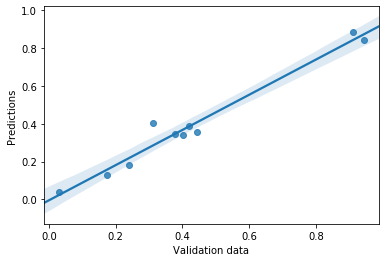

In [231]:
## The line / model
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y_test,y_pred)
plt.xlabel('Validation data')
plt.ylabel('Predictions')

### Regularization 

#### Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

#### Ridge regularization

In [196]:
from sklearn.linear_model import Ridge

regr = LinearRegression()
regr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print("ridge regression train score with alpha 0.01:", Ridge_train_score)
print("ridge regression test score with alpha 0.01:", Ridge_test_score)

linear regression train score: 0.9263303452685306
linear regression test score: 0.9766305196334015
ridge regression train score with alpha 0.01: 0.9264010233280078
ridge regression test score with alpha 0.01: 0.9711006425111857


Which hyperparameters are important? 
1. The training and validation set to split.
2. The features which affect the target variable is the hyperparameter.
3. Alpha in the regularization 

####  Regularization did not have any effect on the data as there is no overfitting of the data

## Random forest

#### Train,test and validation split

Data is split into 3 parts 

Training data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [233]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [234]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score',r2_score(y_train, random_model.predict(X_train)))

Training score -1.8221626987502404e-05


In [235]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -1.8221626987502404e-05
R2 score for test data -0.04395530687482996
Root mean square error score on training set 0.29403258924963577
Root mean square error score on test set 0.40821862971855044


### The training and test score is quite bad without tuning the hyperparameters

### So we use Grid search for the tunning the hyper parameter


Which hyperparameters are important? 
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Used the Grid Search to tune the **Hyper Parameter** and found the best possible hyperparameter for the Random Hyperparameter Grid.

After hyperparameter tunning, the model did better performance.

In [236]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [237]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [238]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [239]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =1000,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features= 'sqrt',
 max_depth = 110,
 bootstrap = True)
random_model.fit(X_train, y_train)
print('Training score is',r2_score(y_train, random_model.predict(X_train)))

Training score is 0.9934223424595483


In [240]:
print('Testing score is ',r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print('Root mean square error is',rmse)

Testing score is  0.913010267766297
Root mean square error is 0.11783813608842786


### Artifical Neural Network

#### Train test split

In [175]:
#Train test split
train_dataset = df_joined.sample(frac=0.8,random_state=0)
test_dataset = df_joined.drop(train_dataset.index)

#### Performing Exploratory Data Analysis

In [176]:
train_dataset = train_dataset.drop('Country code',axis =1)
train_dataset = train_dataset.drop('date',axis =1)
test_dataset = test_dataset.drop('Country code',axis =1)
test_dataset = test_dataset.drop('date',axis =1)

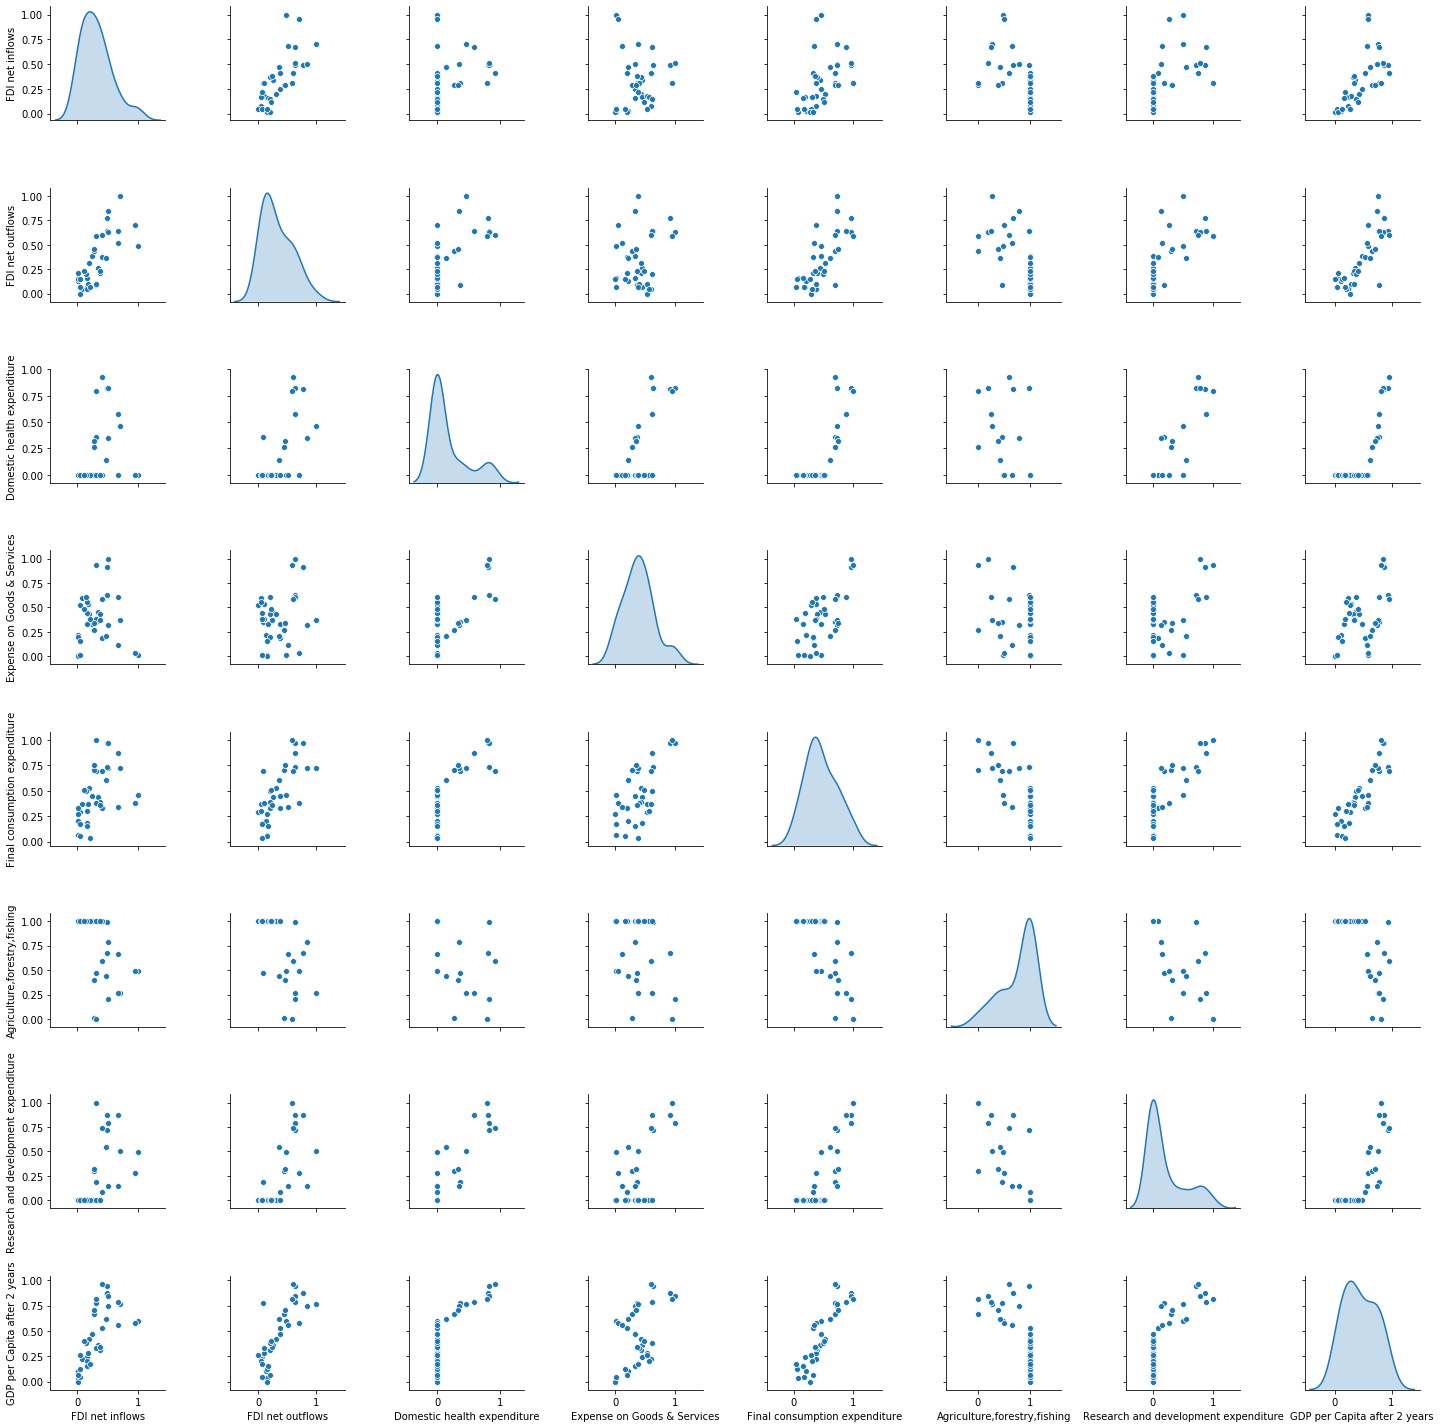

In [154]:
#Ploting pairwise relationships in the dataset 
sns.pairplot(train_dataset, diag_kind="kde")

In [177]:
#computing a summary of statistics 
train_stats = train_dataset.describe()

#Droping the target column
train_stats.pop("GDP per Capita after 2 years")

#Transpose of the dataset
train_stats = train_stats.transpose()
train_stats

count      mean       std       min  \
FDI net inflows                        37.0  0.318475  0.250890  0.014244   
FDI net outflows                       37.0  0.335410  0.260352  0.000000   
Domestic health expenditure            37.0  0.179996  0.302756  0.000000   
Expense on Goods & Services            37.0  0.387255  0.251203  0.000000   
Final consumption expenditure          37.0  0.467997  0.262065  0.039878   
Agriculture,forestry,fishing           37.0  0.776954  0.323292  0.000000   
Research and development expenditure   37.0  0.215761  0.317387  0.000000   

                                           25%       50%       75%       max  
FDI net inflows                       0.148222  0.286271  0.468378  1.000000  
FDI net outflows                      0.129092  0.231292  0.520727  1.000000  
Domestic health expenditure           0.000000  0.000000  0.324702  0.924457  
Expense on Goods & Services           0.205426  0.370988  0.530108  1.000000  
Final consumption expenditure         0.302463  0.393218  0.696756  1.000000  
Agriculture,forestry,fishing          0.495766  1.000000  1.000000  1.000000  
Research and development expenditure  0.000000  0.000000  0.315807  1.000000

In [178]:
#Droping the target lable in the train and test dataset
train_labels = train_dataset.pop('GDP per Capita after 2 years')
test_labels = test_dataset.pop('GDP per Capita after 2 years')

In [179]:
#Function for normalising the dataset
def norm(a):
    return (a - train_stats['mean']) / train_stats['std']

In [180]:
#Normalization of train and test dataset
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [181]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [182]:
#Building the model with one input, hidden and output layer.

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    #using optimizer perform backpropagation and 0.001 is the learning rate
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) #update weights
    return model

In [183]:
model = build_model()

In [184]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [185]:
example_batch = normed_train_data[:9]
example_result = model.predict(example_batch)
example_result

array([[ 0.06358364],
       [ 0.12101533],
       [ 0.04467841],
       [ 0.03135204],
       [-0.0686149 ],
       [ 0.08458593],
       [ 0.11168151],
       [ 0.16204788],
       [ 0.03909199]], dtype=float32)

In [186]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [187]:
#Earlystopping to avoid overfitting
earlystopper = EarlyStopping(patience=3, verbose=1)

filepath = "model.h5"

#save the model in model.h5
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

 

callbacks_list = [earlystopper, checkpoint]

In [188]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=callbacks_list)

Train on 29 samples, validate on 8 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 0.10599, saving model to model.h5
29/29 [==============================] - 0s 4ms/sample - loss: 0.2334 - mae: 0.3924 - mse: 0.2334 - val_loss: 0.1060 - val_mae: 0.2585 - val_mse: 0.1060
Epoch 2/1000

Epoch 00002: val_loss improved from 0.10599 to 0.05321, saving model to model.h5
29/29 [==============================] - 0s 653us/sample - loss: 0.0843 - mae: 0.2291 - mse: 0.0843 - val_loss: 0.0532 - val_mae: 0.1817 - val_mse: 0.0532
Epoch 3/1000

Epoch 00003: val_loss improved from 0.05321 to 0.03549, saving model to model.h5
29/29 [==============================] - 0s 620us/sample - loss: 0.0441 - mae: 0.1580 - mse: 0.0441 - val_loss: 0.0355 - val_mae: 0.1418 - val_mse: 0.0355
Epoch 4/1000

Epoch 00004: val_loss improved from 0.03549 to 0.02944, saving model to model.h5
29/29 [==============================] - 0s 619us/sample - loss: 0.0324 - mae: 0.1374 - mse: 0.0324 - val_loss: 0.0294

In [189]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
23  0.003072  0.042997  0.003072  0.013233  0.096788  0.013233     23
24  0.002979  0.043938  0.002979  0.011587  0.081181  0.011587     24
25  0.003065  0.043004  0.003065  0.013685  0.099423  0.013685     25
26  0.003153  0.048618  0.003153  0.012908  0.082480  0.012908     26
27  0.003697  0.049380  0.003697  0.014582  0.097944  0.014582     27

In [192]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

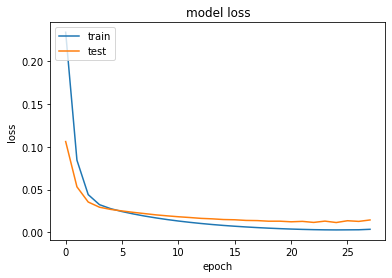

In [193]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [194]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.0103 - mae: 0.0840 - mse: 0.0103
Testing set Mean Abs Error:  0.08


In [200]:
print("Accuracy is", (1 - loss))

Accuracy is 0.9896924756467342


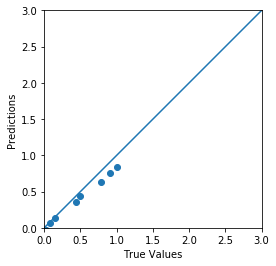

In [201]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)
_ = plt.plot([-100, 100], [-100, 100])

In [202]:
test_predictions

array([ 0.83620113,  0.7540253 ,  0.6279605 ,  0.43572676,  0.35433942,
        0.13183959,  0.06807486, -0.0292077 , -0.03724059], dtype=float32)

### ***Test scores of all the three models:***

In [241]:
print("linear regression test score:", test_score)
print('Random forest testing score is ',r2_score(y_test, random_model.predict(X_test)))
print("ANN testing score is", (1 - loss))

linear regression test score: 0.949719406122447
Random forest testing score is  0.913010267766297
ANN testing score is 0.9896924756467342


## Conclusion

After using different algorithms it can be concluded that ***Artifical Neural Network*** has better test score and its the best way to predict the GDP per captia of a country.

After our analysis, we have come to a conclusion that ***FDI net inflows, Domestic health expenditure, Final consumption expenditure and Research and development expenditure*** are important factors impacting GDP per capita for ***USA***